C:\Users\Ntinos\AppData\Local\Temp\ipykernel_10444\2520648182.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pokemon", y="ImageCount", data=df, palette=colors)


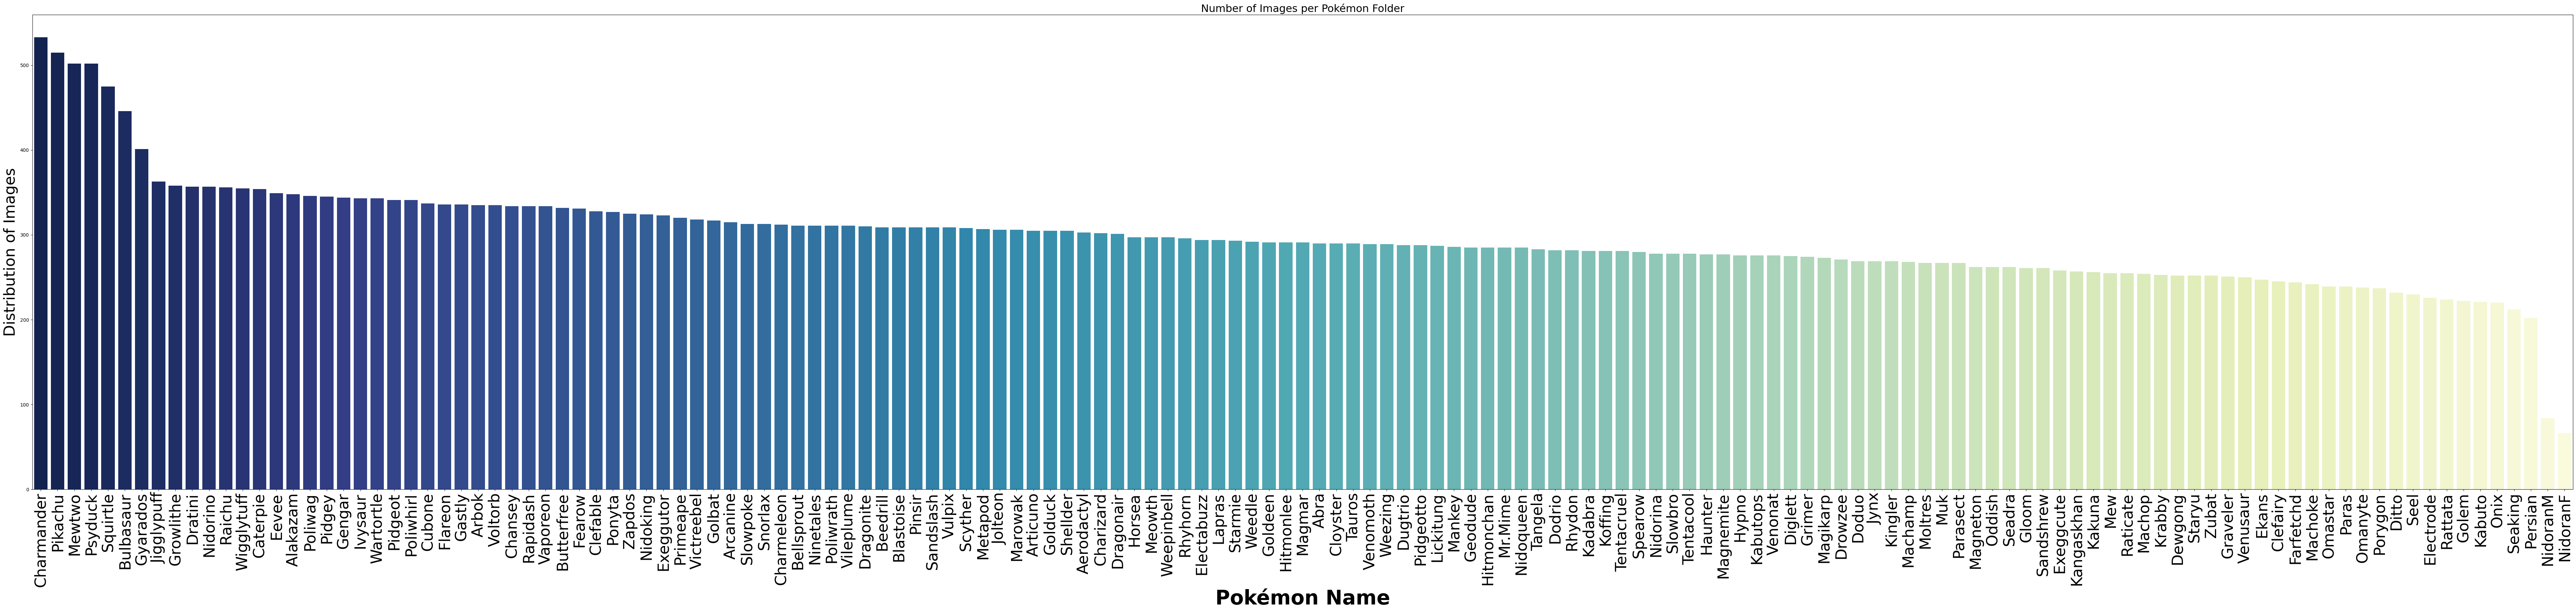

In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Path to the main dataset folder
base_path = r"C:\Users\Ntinos\Desktop\Ntinos\HA\Second_Obliteration\ML\Poke_images\Final_Dataset_IF_THINGS_GET_FUCKED_UP"

# Image file extensions to include
image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')

# Dictionary to hold image count per folder
folder_image_counts = {}

# Loop through each subfolder
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    if os.path.isdir(folder_path):
        image_count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(image_extensions)
        )
        folder_image_counts[folder_name] = image_count

# Sort and prepare DataFrame
sorted_counts = sorted(folder_image_counts.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_counts, columns=["Pokemon", "ImageCount"])

# Set plot size
plt.figure(figsize=(max(15, len(df) * 0.5), 18))

# Create barplot with blue to yellow color gradient
colors = sns.color_palette("YlGnBu_r", len(df))  # "YlGnBu" = Yellow-Green-Blue
sns.barplot(x="Pokemon", y="ImageCount", data=df, palette=colors)

# Customize appearance
plt.xticks(rotation=90, fontsize=32)
plt.ylabel('Distribution of Images', fontsize=32)
plt.xlabel('Pokémon Name', fontsize=42,fontweight='bold')
plt.title('Number of Images per Pokémon Folder', fontsize=22)
plt.tight_layout()
plt.show()


In [2]:
import os

# Root directory containing subfolders with images
root_dir = r"C:\Users\Ntinos\Desktop\Ntinos\HA\Second_Obliteration\ML\Poke_images\Dataset_types"

# Supported image file extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

# Dictionary to store counts
image_counts = {}

# Walk through subdirectories
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        count = 0
        for file in os.listdir(subdir_path):
            if os.path.splitext(file)[1].lower() in image_extensions:
                count += 1
        image_counts[subdir] = count

# Print the counts
for folder, count in image_counts.items():
    print(f"{folder}: {count} images")


Bug: 1557 images
Electric: 1549 images
Fighting: 1088 images
Fire: 2285 images
Grass: 1225 images
Ground_Rock: 2066 images
Normal: 3678 images
Poison: 2731 images
Psychic: 1593 images
Water: 4489 images


C:\Users\Ntinos\AppData\Local\Temp\ipykernel_10820\2622742503.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Folder', y='ImageCount', palette='YlGnBu_r')


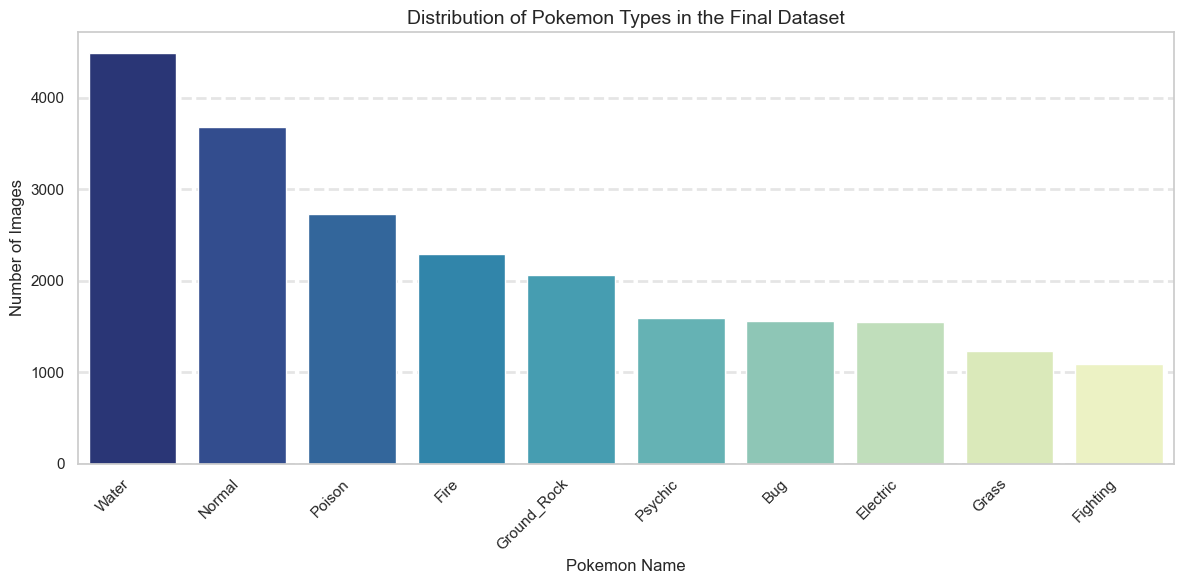

In [5]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Root directory
root_dir = r"C:\Users\Ntinos\Desktop\Ntinos\HA\Second_Obliteration\ML\Poke_images\Dataset_types"

# Supported image formats
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

# Count images per folder
image_counts = {}
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        count = sum(
            1 for file in os.listdir(subdir_path)
            if os.path.splitext(file)[1].lower() in image_extensions
        )
        image_counts[subdir] = count

# DataFrame + sort
df = pd.DataFrame(list(image_counts.items()), columns=['Folder', 'ImageCount'])
df = df.sort_values(by='ImageCount', ascending=False)

# Plot with reversed blue-to-yellow palette
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Folder', y='ImageCount', palette='YlGnBu_r')
plt.title('Distribution of Pokemon Types in the Final Dataset', fontsize=14)
plt.xlabel('Pokemon Name', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5,linewidth=2.0)

plt.savefig("distributio_per_class.png", dpi=300, bbox_inches='tight')

plt.show()


c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ntinos\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Tran

Plot saved as dominant_colors_per_class.png


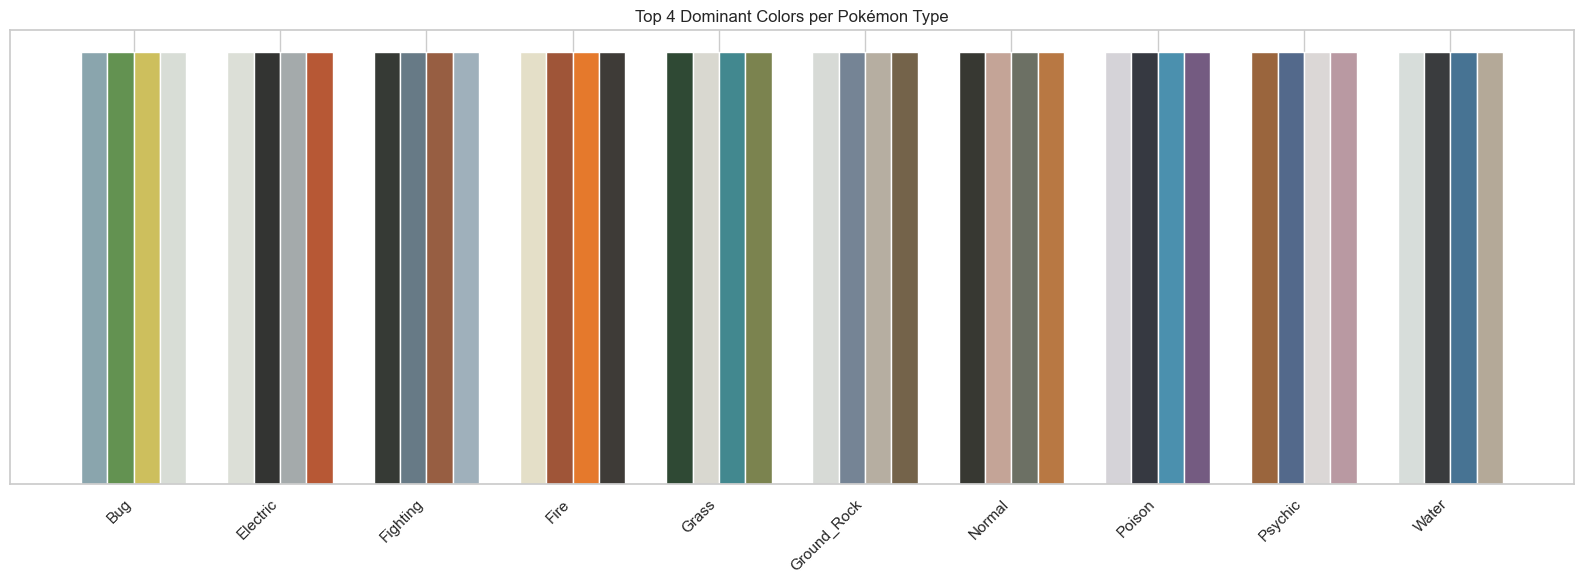

In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Configuration
root_dir = r"C:\Users\Ntinos\Desktop\Ntinos\HA\Second_Obliteration\ML\Poke_images\Dataset_types"
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}
num_colors_per_class = 4
resize_to = 64

# Store results
class_palette = []

# Loop through folders (classes)
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    all_pixels = []

    for file in os.listdir(folder_path):
        if os.path.splitext(file)[1].lower() in image_extensions:
            try:
                img_path = os.path.join(folder_path, file)
                with Image.open(img_path).convert('RGB') as img:
                    img = img.resize((resize_to, resize_to))
                    np_img = np.array(img)

                    # Remove near-white and near-black pixels
                    mask = ~((np_img > 240).all(axis=-1))  # Remove near-white
                    mask &= ~((np_img < 25).all(axis=-1))   # Remove near-black
                    pixels = np_img[mask]

                    if len(pixels) > 0:
                        all_pixels.append(pixels)
            except Exception as e:
                print(f"Error with {file}: {e}")

    if all_pixels:
        all_pixels = np.vstack(all_pixels)

        # Cluster for dominant colors (extra to allow filtering)
        kmeans = KMeans(n_clusters=min(6, len(all_pixels)), random_state=0, n_init='auto')
        kmeans.fit(all_pixels)
        dominant_colors = kmeans.cluster_centers_.astype(int)

        # Filter out black-like colors
        filtered_colors = [color for color in dominant_colors if not np.all(color < 25)]

        # Pad with white if fewer than 4 remain
        while len(filtered_colors) < num_colors_per_class:
            filtered_colors.append(np.array([255, 255, 255]))

        # Store exactly 4 colors
        for color in filtered_colors[:num_colors_per_class]:
            color_hex = f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}"
            class_palette.append({
                'Class': folder,
                'Color': color_hex
            })

# Create DataFrame
df = pd.DataFrame(class_palette)

# Plotting
unique_classes = df['Class'].unique()
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}
bar_width = 0.18

plt.figure(figsize=(16, 6))

for i, row in df.iterrows():
    cls = row['Class']
    color = row['Color']
    bar_offset = (i % num_colors_per_class - 1.5) * bar_width
    x = class_to_index[cls] + bar_offset
    plt.bar(x, 1, width=bar_width, color=color)

plt.title('Top 4 Dominant Colors per Pokémon Type')
plt.xticks(ticks=range(len(unique_classes)), labels=unique_classes, rotation=45, ha='right')
plt.yticks([])  # No y-axis needed
plt.tight_layout()

# Save the figure
plt.savefig("dominant_colors_per_class.png", dpi=300, bbox_inches='tight')
print("Plot saved as dominant_colors_per_class.png")

plt.show()
